### Importing dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

### Loading the dataset

In [8]:
data = pd.read_csv('Iris.csv')
data.shape

(150, 6)

### Exploratory Data Analysis

In [9]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Insights about the dataset
 - Our dataset consists of 150 rows and 6 features.
 - Out of which Id column denotes unique id and can be removed as it is of no relevance for classification task.
 - Species column denotes the species of the flowers to which they belong. (Target column) 
 - The data in Species column is Categorical in nature and we need to convert it in numerical variables

In [10]:
data.drop('Id',axis=1,inplace=True)

In [11]:
label_encode = LabelEncoder()

In [12]:
data = data.apply(label_encode.fit_transform)

In [13]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0


In [14]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.00000,150.000000,150.000000
mean,15.386667,9.540000,18.20000,8.986667,1.000000
std,8.175743,4.300195,11.64866,6.405730,0.819232
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,8.000000,7.000000,6.00000,2.000000,0.000000
50%,15.000000,9.000000,19.50000,9.000000,1.000000
75%,21.000000,12.000000,27.00000,14.000000,2.000000
max,34.000000,22.000000,42.00000,21.000000,2.000000


In [15]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

So, there are no missing values in our dataset

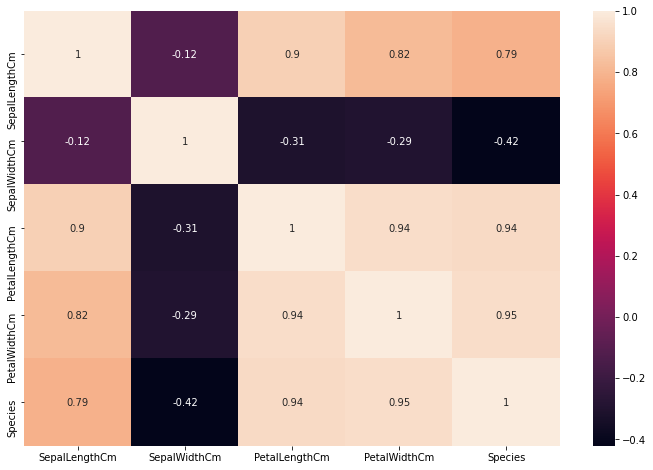

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Finding number of classes and frequency distribution of each sample in the dataset

No. of samples of each class is:
 2    50
1    50
0    50
Name: Species, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


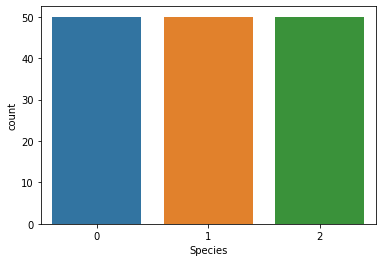

In [18]:
print("No. of samples of each class is:\n",data.Species.value_counts())
plt.figure(figsize=(6,4))
sns.countplot(data.Species)
plt.show()

We can conclude that our dataset contains 50 samples of each of the 3 classes and there is no class imbalance.

### Spltting the data into independent and dependent sets.

In [19]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

### Splitting the data for training and validation

In [20]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y,test_size=0.25,random_state=42)

### Building a Decision Tree Classifier model

In [21]:
dt = DecisionTreeClassifier()

In [22]:
model = dt.fit(X_train,Y_train)

In [23]:
print("The accuracy of our model on the training set is: ",model.score(X_train,Y_train))
print("The accuracy of our model on the validation set is: ",model.score(X_val,Y_val))

The accuracy of our model on the training set is:  1.0
The accuracy of our model on the validation set is:  1.0


### Visualizing our built Decision tree

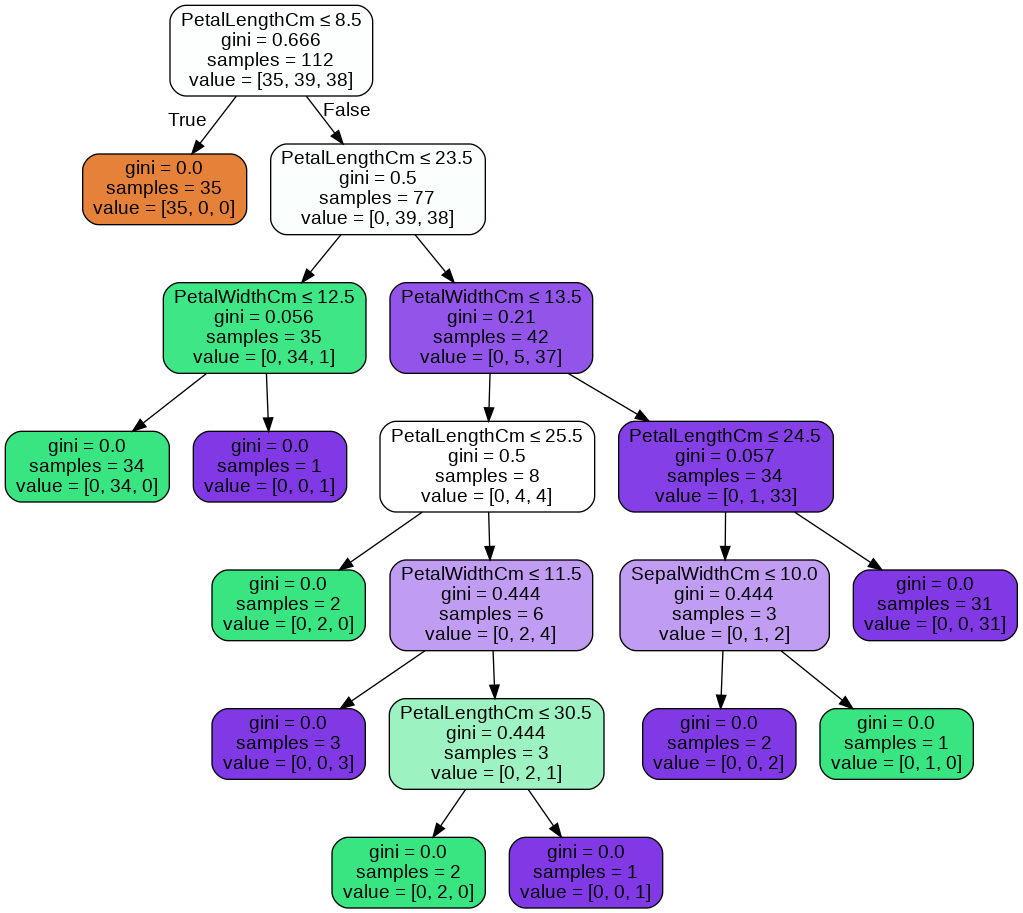

In [24]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
# Visualize the graph
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())